In [182]:
!pip show torch

Name: torch
Version: 1.11.0+cu113
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.7/dist-packages
Requires: typing-extensions
Required-by: torchvision, torchtext, torchaudio, fastai


In [183]:
# Install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# Install mmdetection
!pip install mmdet

# Install mmocr
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -r requirements.txt
!pip install -v -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'mmocr' already exists and is not an empty directory.
/content/mmocr/mmocr
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. P

In [184]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check mmocr installation
import mmocr
print(mmocr.__version__)

%cd /mmocr/
!ls

1.11.0+cu113 False
2.24.1
1.5.2
11.1
GCC 7.3
0.6.0
[Errno 2] No such file or directory: '/mmocr/'
/content/mmocr/mmocr
apis  core  datasets  __init__.py  models  __pycache__	utils  version.py


## Select Image

In [203]:
# MANUALLY INSERT FILE INTO /content/ with name test.jpg

#%cd '/content/'
#from google.colab import files
#uploaded = files.upload()

Saving PXL_20220601_065050668.jpg to PXL_20220601_065050668.jpg


## Image Preprocess

In [187]:
from PIL import Image

img = Image.open('/content/test.jpg').convert('L')
img.save('/content/greyscale.jpg')

## Test Detection + Regonition

In [188]:

from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='DRRG', recog='SEG')

ResultOut = mmocr.readtext('/content/greyscale.jpg', output='outputs/demo_text_det_pred2.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/drrg/drrg_r50_fpn_unet_1200e_ctw1500_20211022-fb30b001.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/seg/seg_r31_1by16_fpnocr_academic-72235b11.pth


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


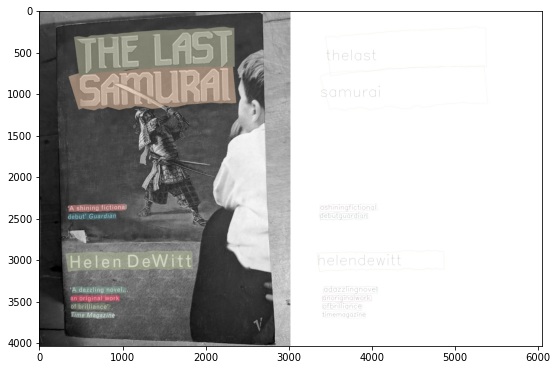

In [189]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('outputs/demo_text_det_pred2.jpg')
plt.figure(figsize=(9, 16))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

In [190]:
TextOutList = ResultOut[0]['text']
print(TextOutList)


TextOutString = ' '.join(TextOutList)
print(TextOutString)

# Remove emails from string
import re

regex = r"\S*@\S*\s?"

subst = ""

result = re.sub(regex, subst, TextOutString, 0)

regex = r"\S*/\S*\s?"

subst = ""

result = re.sub(regex, subst, TextOutString, 0)

if result:
    print (result)


['anoriginalwork', 'ashiningfictional', 'samurai', 'ofbrilliance', 'timemagazine', 'debutguardian', 'thelast', 'adazzlingnovel', 'helendewitt']
anoriginalwork ashiningfictional samurai ofbrilliance timemagazine debutguardian thelast adazzlingnovel helendewitt
anoriginalwork ashiningfictional samurai ofbrilliance timemagazine debutguardian thelast adazzlingnovel helendewitt


In [191]:
LongerWordRemoved = re.sub(r'\b\w{14,}\b', '', result)

## WordNinja

In [192]:
!pip3 install wordninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
import wordninja
result2 = wordninja.split(LongerWordRemoved)
print(result2)
result3 = ' '.join(result2)
print(result3)

['samurai', 'of', 'brilliance', 'time', 'magazine', 'debut', 'guardian', 'the', 'last', 'helen', 'dewitt']
samurai of brilliance time magazine debut guardian the last helen dewitt


## AutoCorrect

In [194]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [195]:
from autocorrect import Speller
 
check = Speller(lang='en')

In [196]:
AutoCorrectResult = check(result3)

## Spacy

In [197]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [198]:
text1= NER(AutoCorrectResult)

In [199]:
GuessAuthor=''
for word in text1.ents:
    print(word.text,word.label_)
    GuessAuthor+=" "+word.text
print(GuessAuthor)
print(AutoCorrectResult)


samurai of brilliance time magazine debut guardian the last helen deity


In [200]:
#Remove Author from Title
RemoveAuthor = AutoCorrectResult.replace(GuessAuthor,'')
print(RemoveAuthor)
print(GuessAuthor)

samurai of brilliance time magazine debut guardian the last helen deity



## Sentence Rearranger

## Google Books Api

In [201]:
import requests

title = RemoveAuthor
author = GuessAuthor

def get_book_details_from_google(title, author):
    bookResponse = requests.get('https://www.googleapis.com/books/v1/volumes?q=' + title + author)           
    jsondict = bookResponse.json()
    firstbookresultdetails = jsondict['items'][0]['volumeInfo']
    print(firstbookresultdetails['title'])
    print(firstbookresultdetails['authors'])
    print(firstbookresultdetails['publisher'])
    print(firstbookresultdetails['categories'])
    
get_book_details_from_google(title, author)

The Last Samurai
['Helen DeWitt']
New Directions Publishing
['Fiction']
